In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from spectroscopy.utils import load_training_data, plot_residuals, get_wavelength_columns, parse_trm_files

In [4]:
from spectroscopy.model import load_model, get_features

In [5]:
df_trms = parse_trm_files()
# fill negative values of trms
# wavelength_columns = get_wavelength_columns(df_trms)
# df_trms[df_trms[wavelength_columns] < 0][wavelength_columns] = 0
num = df_trms._get_numeric_data()

num[num < 0] = 0

In [6]:
num[num < 0]

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1737.13,1738.88,1740.63,1742.38,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
model = load_model(model_dir=Path().cwd().parent/'bin'/'model')

In [8]:
data = load_training_data()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 520 entries, 862.13 to Moisture
dtypes: float64(512), int64(2), object(6)
memory usage: 812.6+ KB


In [10]:
data.describe()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88,integration_time,run_number,Ammonia-N,Moisture
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,1.000000e-03,1.000000e-03,1.000000e-03,9.901022,38.542137,32.564984,58.357895,60.640615,60.167605,58.186190,...,53.735745,53.825630,53.894620,53.970890,54.062445,54.179170,40.300000,1.885000,0.360300,22.36660
std,2.173846e-19,2.173846e-19,2.173846e-19,20.351293,86.473192,65.745699,11.230318,11.456488,11.405822,11.201562,...,10.800146,10.807613,10.819466,10.825458,10.828973,10.825276,2.728962,0.833817,0.305992,14.87249
min,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,15.144000,15.920000,15.825000,15.246000,...,15.925000,15.931000,15.938000,15.998000,16.056000,16.092000,35.000000,1.000000,0.070000,8.96000
25%,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,53.981750,56.363750,55.722500,53.735250,...,49.035500,49.086500,49.127000,49.153500,49.188000,49.315750,40.000000,1.000000,0.200000,11.80000
50%,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,59.711000,62.551000,61.969000,59.574000,...,54.109500,54.210500,54.258500,54.314000,54.390000,54.477000,40.000000,2.000000,0.320000,19.80000
75%,1.000000e-03,1.000000e-03,1.000000e-03,12.838500,39.724000,41.280500,66.054000,68.343000,67.796750,65.645750,...,61.312750,61.422000,61.478000,61.494250,61.622250,61.709750,40.000000,3.000000,0.440000,25.30000
max,1.000000e-03,1.000000e-03,1.000000e-03,101.090000,464.490000,369.440000,76.971000,78.993000,78.589000,76.930000,...,73.608000,73.651000,73.713000,73.801000,73.876000,73.898000,45.000000,3.000000,2.240000,82.10000


In [11]:
data['sample_name'].value_counts()

hampton west 2     10
hampton east 2      9
south 2             6
south 9             6
hampton west        6
south 15            6
south 16            6
south 17            6
south 1             6
south 11            4
south 7             4
north 7             4
north 3             4
south 18            4
hampton west 1      4
south 8             4
south 14            4
north 2             4
north 8             4
north 4             4
south 12            4
south 6             4
north 6             4
south 10            4
south 5             4
south 13            4
south 3             4
north 9             4
north 1             4
south 4             4
north 5             4
hampton east        3
north 12            3
north 17            3
north 14            3
hampton coulter     3
west 13             3
north 10            3
west 12             3
dows wet            3
iowa falls          3
hampton east 1      3
north 11            3
north 13            3
north 18            3
west 14   

In [12]:
feature_columns = get_features(data)
X, y = data[feature_columns], data['Moisture']

In [13]:
feature_columns

['862.13',
 '863.88',
 '865.63',
 '867.38',
 '869.13',
 '870.88',
 '872.63',
 '874.38',
 '876.13',
 '877.88',
 '879.63',
 '881.38',
 '883.13',
 '884.88',
 '886.63',
 '888.38',
 '890.13',
 '891.88',
 '893.63',
 '895.38',
 '897.13',
 '898.88',
 '900.63',
 '902.38',
 '904.13',
 '905.88',
 '907.63',
 '909.38',
 '911.13',
 '912.88',
 '914.63',
 '916.38',
 '918.13',
 '919.88',
 '921.63',
 '923.38',
 '925.13',
 '926.88',
 '928.63',
 '930.38',
 '932.13',
 '933.88',
 '935.63',
 '937.38',
 '939.13',
 '940.88',
 '942.63',
 '944.38',
 '946.13',
 '947.88',
 '949.63',
 '951.38',
 '953.13',
 '954.88',
 '956.63',
 '958.38',
 '960.13',
 '961.88',
 '963.63',
 '965.38',
 '967.13',
 '968.88',
 '970.63',
 '972.38',
 '974.13',
 '975.88',
 '977.63',
 '979.38',
 '981.13',
 '982.88',
 '984.63',
 '986.38',
 '988.13',
 '989.88',
 '991.63',
 '993.38',
 '995.13',
 '996.88',
 '998.63',
 '1000.38',
 '1002.13',
 '1003.88',
 '1005.63',
 '1007.38',
 '1009.13',
 '1010.88',
 '1012.63',
 '1014.38',
 '1016.13',
 '1017.88',

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:>

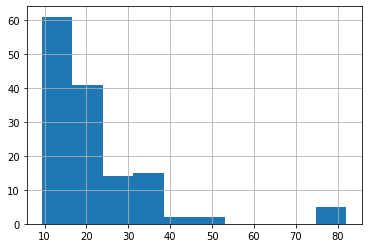

In [15]:
y_train.hist()

<AxesSubplot:>

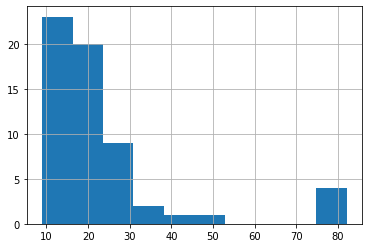

In [16]:
y_test.hist()

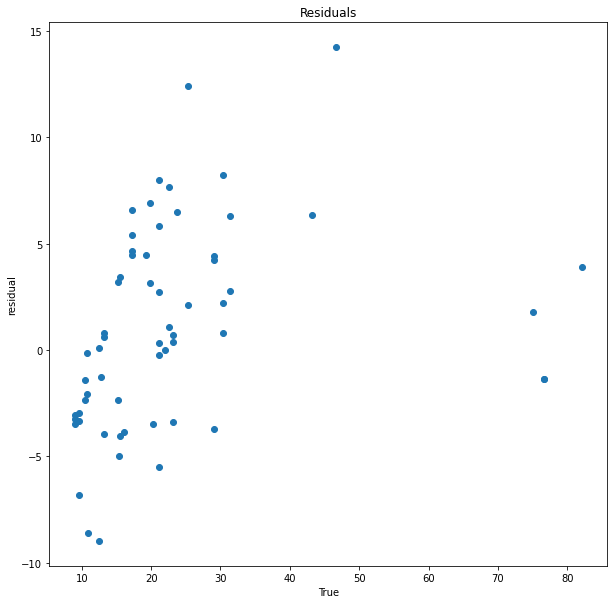

In [17]:
plot_residuals(y_test, model.predict(X_test))

In [18]:
len(X), len(X_test), len(X_train)

(200, 60, 140)

In [19]:
assert (X_test.index == y_test.index).all()

# view highest error samples

In [20]:
def rank_error(model, X, y_true, original_data, n_instances=50):
    y_pred = model.predict(X)
    # calculate error metrics
    residuals = y_true - y_pred
    abs_residuals = np.abs(residuals)
    # get indices of highest error
    abs_res_indices = np.argsort(abs_residuals)[::-1][:n_instances]
    # pull training samples with highest error
    X_ranked = X.iloc[abs_res_indices]
    # pull original data corresponding to those training samples
    high_error_data = data.iloc[X_ranked.index].copy()
    high_error_data['predicted_moisture'] = y_pred[abs_res_indices]
    high_error_data['absolute_residual'] = abs_residuals.iloc[abs_res_indices]
    high_error_data['residual'] = residuals.iloc[abs_res_indices]
    return high_error_data

In [21]:
data_ranked = rank_error(model, X_test, y_test, data)

In [22]:
data_ranked

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,sample_name,sample_date,run_number,process_method,Ammonia-N,filename_lr,Moisture,predicted_moisture,absolute_residual,residual
190,0.001,0.001,0.001,0.0000,0.0000,0.000,38.511,39.957,39.551,38.200,...,west 13,2020-07-06,3,NaN,0.48,Lab Report - West 13 - 7-6-20.csv,46.60,32.3590,14.2410,14.2410
76,0.001,0.001,0.001,0.0000,0.0000,0.000,56.404,59.392,58.918,56.614,...,hampton west 1,2020-07-09,2,NaN,0.31,Lab Report - Hampton West 1 - 7-9-20.csv,25.30,12.9050,12.3950,12.3950
7,0.001,0.001,0.001,0.0000,0.0000,11.811,58.418,60.973,60.310,57.891,...,north 2,2020-07-09,1,ground,0.23,Lab Report - North 2 - 7-9-20.csv,12.50,21.4830,8.9830,-8.9830
87,0.001,0.001,0.001,0.0000,0.0000,26.199,71.052,73.324,72.824,70.759,...,north 3,2020-07-09,1,ground,0.44,Lab Report - North 3 - 7-9-20.csv,10.90,19.5010,8.6010,-8.6010
5,0.001,0.001,0.001,0.0000,0.0000,0.000,60.219,62.969,62.520,60.343,...,south 8,2020-07-08,3,NaN,0.33,Lab Report - South 8 - 7-8-20.csv,30.30,22.0695,8.2305,8.2305
111,0.001,0.001,0.001,0.0000,0.0000,0.000,62.490,65.338,64.932,62.776,...,south 3,2020-07-08,3,NaN,0.40,Lab Report - South 3 - 7-8-20.csv,21.10,13.0902,8.0098,8.0098
43,0.001,0.001,0.001,0.0000,0.0000,0.000,66.664,69.256,68.798,66.541,...,south 5,2020-07-08,1,ground,0.17,Lab Report - South 5 - 7-8-20.csv,22.60,14.9370,7.6630,7.6630
98,0.001,0.001,0.001,0.0000,0.0000,0.000,61.801,64.471,63.924,61.726,...,south 6,2020-07-08,3,NaN,0.32,Lab Report - South 6 - 7-8-20.csv,19.80,12.8840,6.9160,6.9160
172,0.001,0.001,0.001,0.0000,0.0000,0.000,69.310,71.560,71.075,68.810,...,north 4,2020-07-09,1,ground,0.09,Lab Report - North 4 - 7-9-20.csv,9.66,16.4795,6.8195,-6.8195
69,0.001,0.001,0.001,0.0000,0.0000,0.000,74.206,76.112,75.781,73.794,...,south 4,2020-07-08,1,ground,0.38,Lab Report - South 4 - 7-8-20.csv,17.20,10.6255,6.5745,6.5745


In [23]:
data_ranked.to_csv('data_ranked_by_residuals.csv')

In [24]:
X['process_method']

KeyError: 'process_method'

In [ ]:
df = load_training_data()
# df = df[df['process_method'] == 'ground']
df['process_method'].fillna('none', inplace=True)
df['process_method'] = df['process_method'].astype(str)

In [ ]:
len(df)

In [ ]:
df['process_method'].value_counts(dropna=False)

In [ ]:
df['process_method'].unique()

In [ ]:
pd.get_dummies(df['process_method'])

In [ ]:
df = pd.concat([df, pd.get_dummies(df['process_method'])], axis=1)

In [ ]:
df['process_method'].unique()

In [ ]:
feature_columns = get_features(df)
feature_columns

In [ ]:
df['process_method'].isna()